# Traveling Salesman Problem(TSP, 외판원 문제)

Simulated Annealing을 사용하여 TSP 문제를 해결하는 과정, 초기 설정에 따라 다양한 시뮬레이션을 통해 최적의 도시 순서를 찾으며, 각 단계에서 경로 개선 여부를 확률적으로 판단하여 탐색 범위를 확장한다.

## Simulated Annealing
1. 기본 개념:
   - Simulated Annealing은 물리학적 담금질 과정을 모방하여 동작한다. 물리학에서는 물질을 높은 온도에서 점차적으로 식히면서 최적의 결정 구조를 찾는 과정을 '담금질'이라고 한다.
   - 이 개념을 최적화 문제에 적용할 때, 초기에는 큰 허용오차(높은 온도)를 가지고 해 공간을 탐색하며 점차 오차를 줄여가는 방식으로 최적해를 찾는다.

2. 동작 원리:
   - 현재 해의 이웃 해 탐색: 현재 해에서 이웃 해를 생성하고, 이웃 해가 더 나은지 판단한다  
   - 수용 기준: 이웃 해가 현재 해보다 좋으면 항상 이동하고, 나쁘면 일정 확률로 이동한다. 이 확률은 온도(Temperature)에 따라 결정된다.
   - 온도 감소: 시뮬레이션이 진행됨에 따라 온도를 점차적으로 감소시켜, 처음에는 많은 이동을 허용하고 점점 더 나은 해를 찾기 위해 더 적은 이동을 허용한다.
   - 안정화: 일정 시간 동안 최적해가 개선되지 않을 때 알고리즘을 종료한다.

3. 주요 요소:
   - 온도(Temperature): 초기에는 높은 온도에서 시작하여 점차적으로 낮춰가는 값. 높은 온도는 알고리즘이 현재 해에서 멈추지 않고 다양한 해를 탐색할 수 있도록 돕는다.
   - 수용 확률(acceptance probability): 이웃 해가 현재 해보다 나쁠 때도 일정 확률로 이동할 수 있게 한다. 이 확률은 Boltzmann 분포를 사용하여 계산됩니다.

## 코드 설명:

1. 도시와 좌표 생성:
   - ncity : 개수의 도시를 생성하고, 각 도시는 2D 평면상의 랜덤 좌표로 설정

2. 거리 함수 및 총 거리 계산:
   - Distance: 두 도시 사이의 유클리드 거리를 계산한다.
   - TotalDistance: 주어진 도시 순서에 따라 총 경로 거리를 계산한다. 모든 도시를 순서대로 방문한 후 출발 도시로 되돌아오는 거리를 더하여 반환한다.

3. CostSwap 함수:
   - 두 도시의 순서를 바꿨을 때 발생하는 거리 변화를 계산한다. 이는 TSP에서 인접한 두 도시의 위치를 바꾸었을 때 경로 거리의 변화를 나타낸다.

4. Swap 함수:
   - 두 도시의 순서를 실제로 바꾸는 함수

5. TravelingSalesman 함수:
   - Simulated Annealing을 활용하여 TSP 문제를 해결
   - 초기 설정으로 주어진 도시 순서를 점차 최적화하며, 초기 온도부터 점차 낮추면서 최적 경로를 찾는다.
   - `maxSteps` 동안 시도하고, `maxAccepted` 만큼의 시도에서 개선된 경로를 수용한다.
   - `Tstart`는 초기 온도, `fCool`은 냉각률을 나타내며, `maxTsteps`는 최대 온도 단계이다.
   - 각 단계마다 현재 온도, 현재 거리, 수락된 시도 횟수를 출력하며, 최적 경로를 탐색한다.

In [3]:
import scipy as scp
from numpy import random
from numpy import linalg

ncity=100 #들릴 도시 갯수

# random coordinates in 2D for n-cities
R = random.random((ncity,2)) # 도시의 좌표
city = list(range(ncity)) #0~99까지의 숫자열

In [4]:
R = random.random((ncity,2)) # 도시의 좌표
# print(R)
# print(R[2])
# print(type(R))

In [5]:
def Distance(R1,R2): #R1, R2사이의 거리
    return linalg.norm(R1-R2)

def TotalDistance(city, R): # 도시사이의 거리의 합
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]]) #마지막 도시 ~ 처음도시의 거리
    return dist

In [6]:
def Plot(city, R, dist): # 그림그리기
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0],Pt[:,1],'o-')
    show()

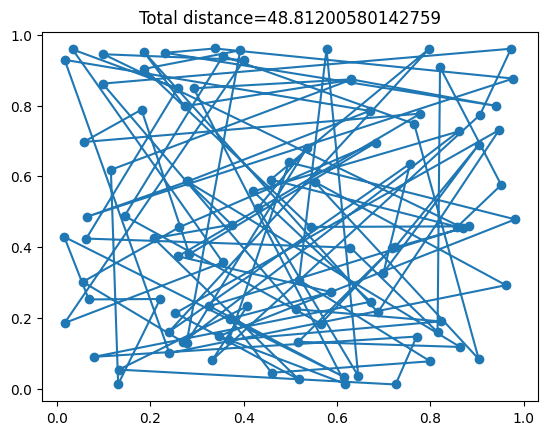

In [7]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [8]:
def CostSwap(R, city, n, ncity):
    original_city = [R[city[(n-1) % ncity]], R[city[n]], R[city[(n+1) % ncity]], R[city[(n+2) % ncity]]]
    change_city = [R[city[(n-1) % ncity]], R[city[(n+1) % ncity]], R[city[n]], R[city[(n+2) % ncity]]]

    original_dist = np.linalg.norm(original_city[0] - original_city[1]) + np.linalg.norm(original_city[1] - original_city[2]) + np.linalg.norm(original_city[2] - original_city[3])
    change_dist = np.linalg.norm(change_city[0] - change_city[1]) + np.linalg.norm(change_city[1] - change_city[2]) + np.linalg.norm(change_city[2] - change_city[3])
    de = change_dist - original_dist
    return de


In [9]:
def Swap(city, n, ncity) :
    new_city = city
    new_city[n], new_city[n+1] = city[n+1], city[n]
    return new_city

In [10]:
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    T = Tstart
    dist = TotalDistance(city,R)
    for t in range(maxTsteps):
      accepted = 0 #simulation analying에 필요한 기법
      for i in range(maxSteps):
        # Try swap
        n = random.randint(0,ncity-1) #자리를 바꿀 도시를 하나 고른다.
        de = CostSwap(R, city, n, ncity) #바꿀떄의 거리가 얼마나 차이가 있나?
        if de < 0 or exp(-de/T) > rand():
          accepted += 1
          dist += de
          city = Swap(city, n, ncity) #순서를 실제로 바꾸는 것
        if accepted > maxAccepted:
          break
      T *= fCool #온도를 낮춘다.
      Plot(city, R, dist)
      print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist,accepted))
      if accepted == 0:
        break
    return city

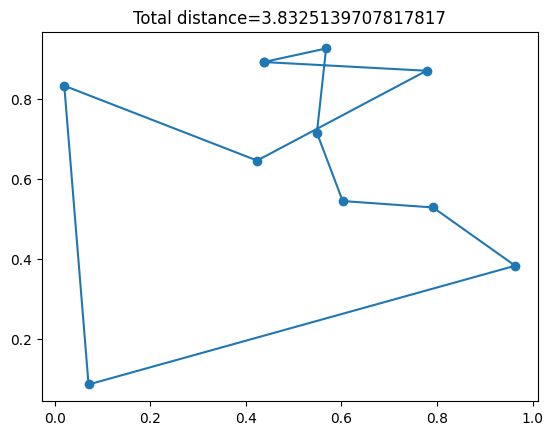

T=   0.18000 , distance=   3.83251 acc.steps=101


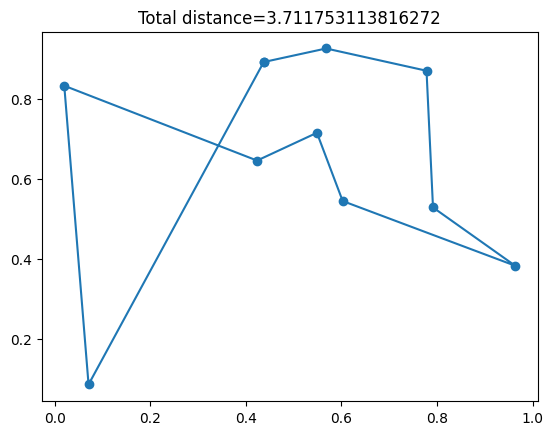

T=   0.16200 , distance=   3.71175 acc.steps=101


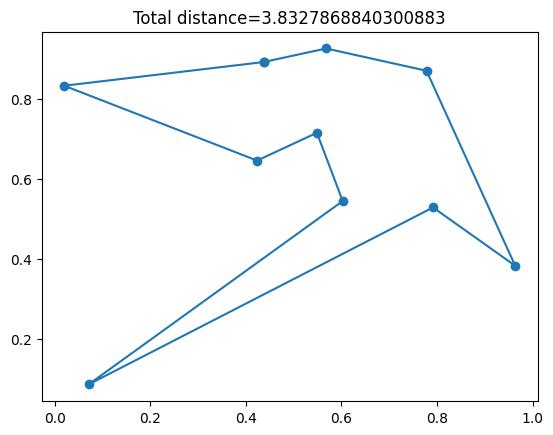

T=   0.14580 , distance=   3.83279 acc.steps=101


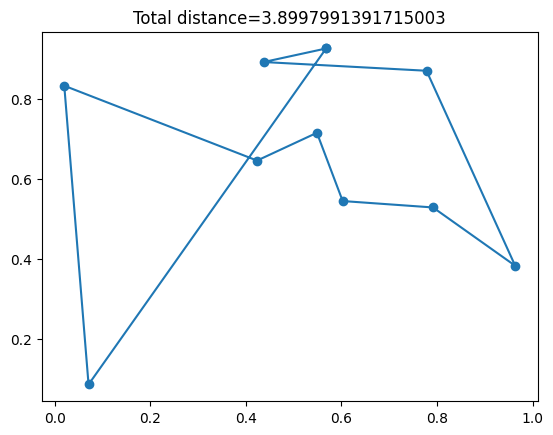

T=   0.13122 , distance=   3.89980 acc.steps=101


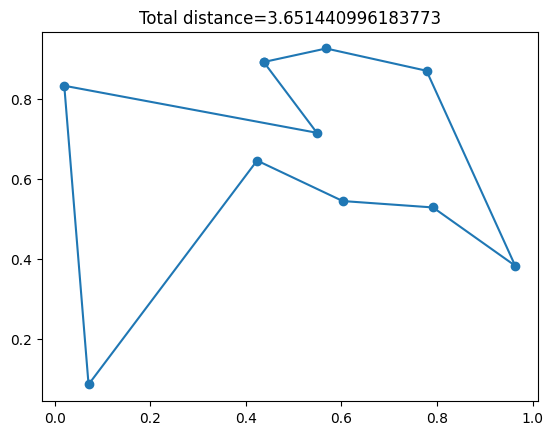

T=   0.11810 , distance=   3.65144 acc.steps=101


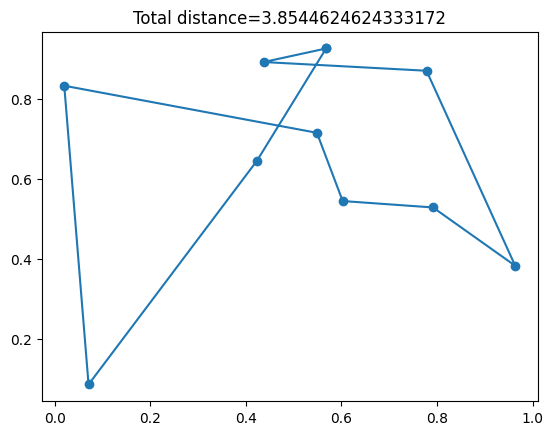

T=   0.10629 , distance=   3.85446 acc.steps=101


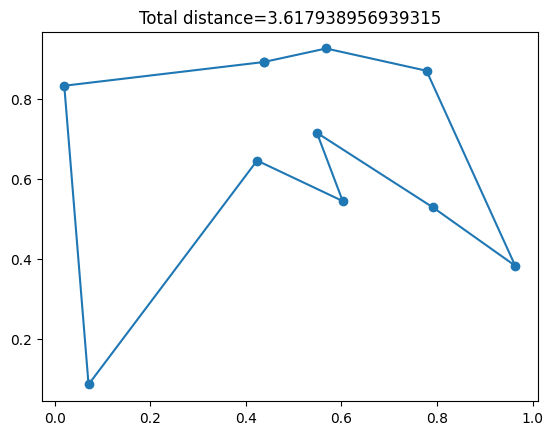

T=   0.09566 , distance=   3.61794 acc.steps=101


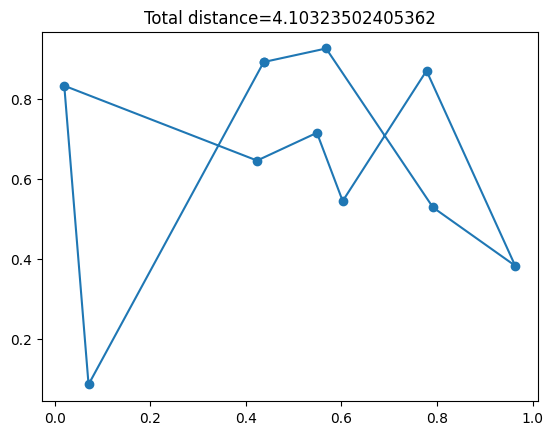

T=   0.08609 , distance=   4.10324 acc.steps=101


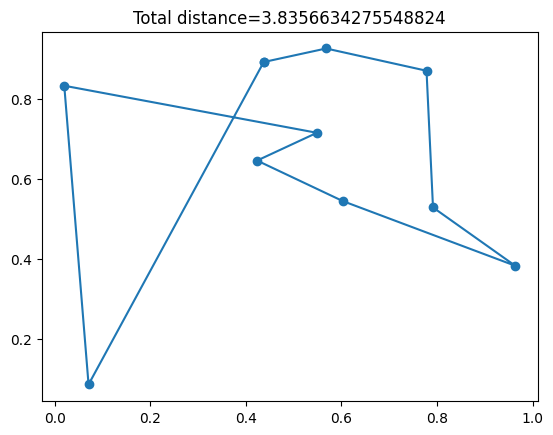

T=   0.07748 , distance=   3.83566 acc.steps=101


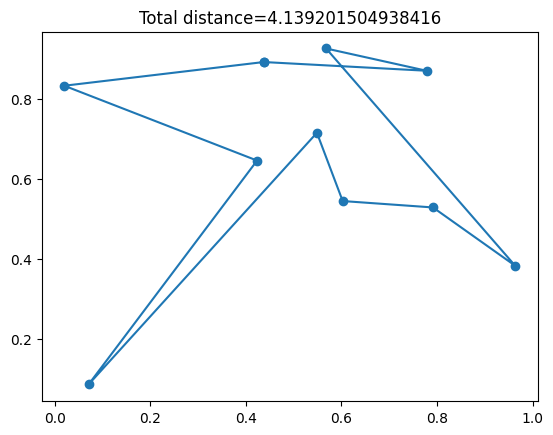

T=   0.06974 , distance=   4.13920 acc.steps=101


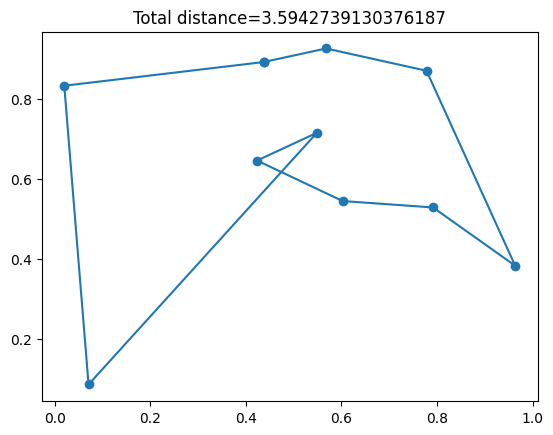

T=   0.06276 , distance=   3.59427 acc.steps=101


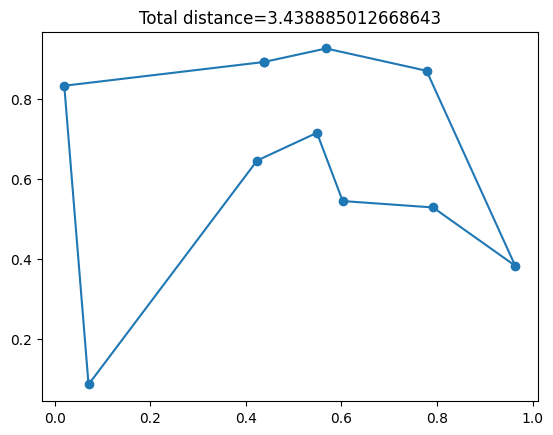

T=   0.05649 , distance=   3.43889 acc.steps=101


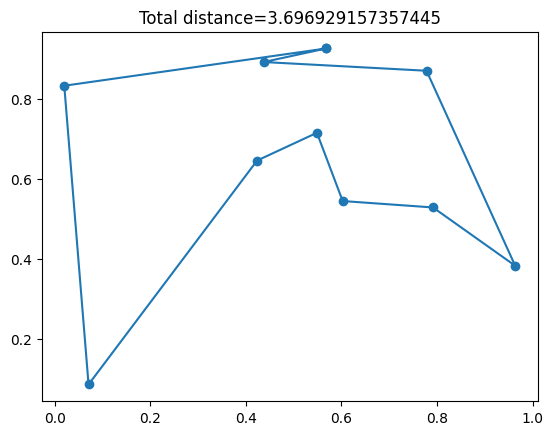

T=   0.05084 , distance=   3.69693 acc.steps=101


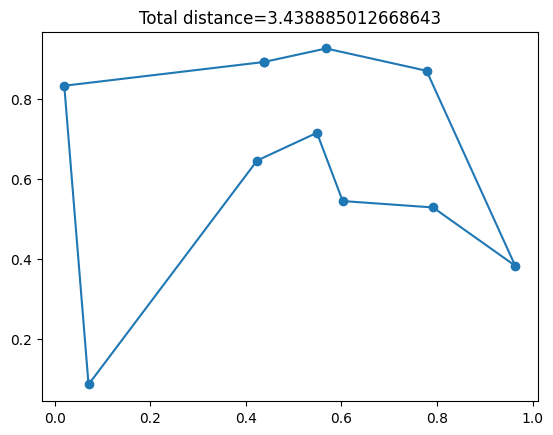

T=   0.04575 , distance=   3.43889 acc.steps=101


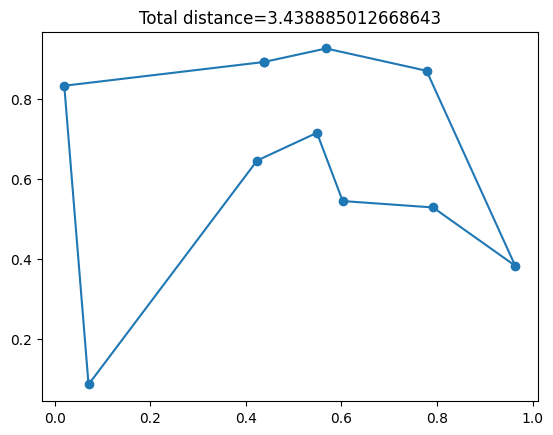

T=   0.04118 , distance=   3.43889 acc.steps=96


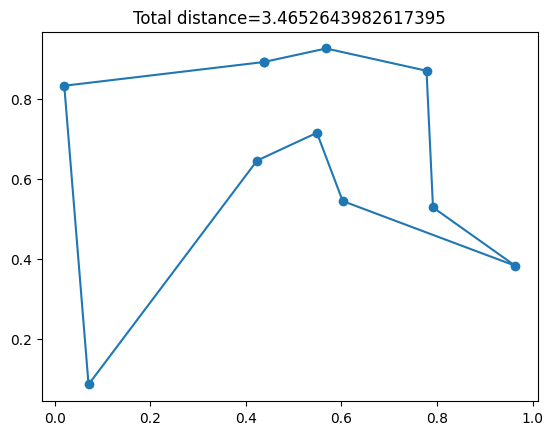

T=   0.03706 , distance=   3.46526 acc.steps=89


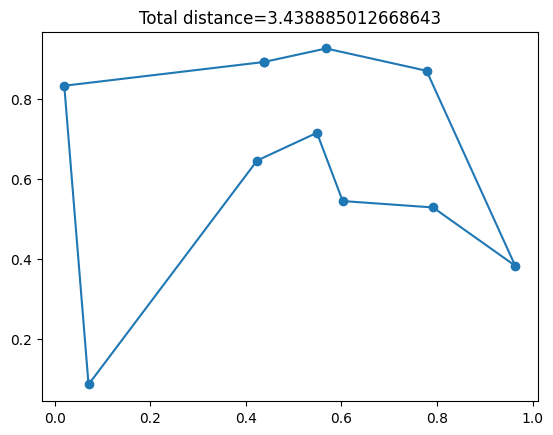

T=   0.03335 , distance=   3.43889 acc.steps=89


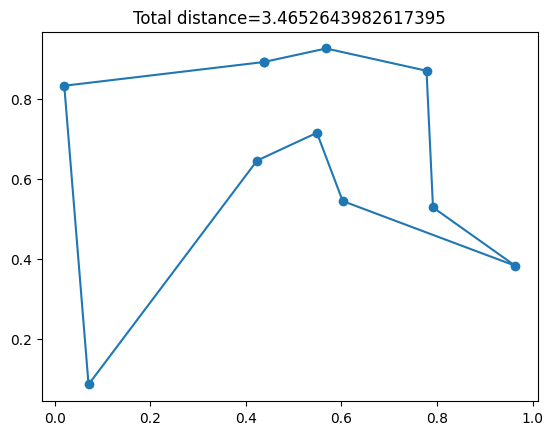

T=   0.03002 , distance=   3.46526 acc.steps=73


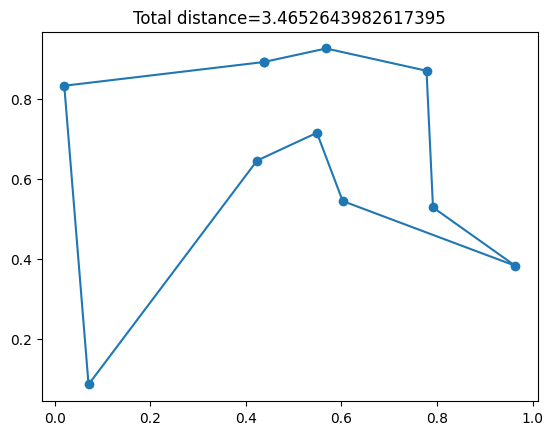

T=   0.02702 , distance=   3.46526 acc.steps=76


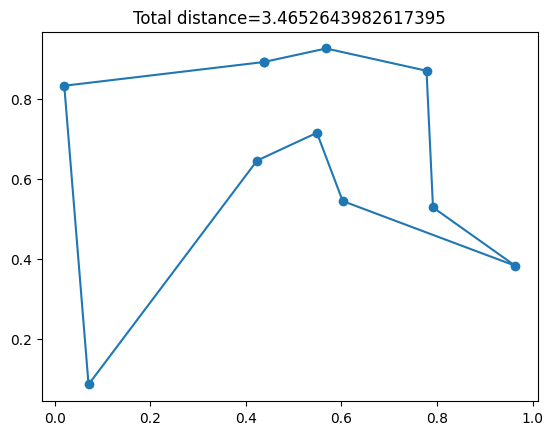

T=   0.02432 , distance=   3.46526 acc.steps=52


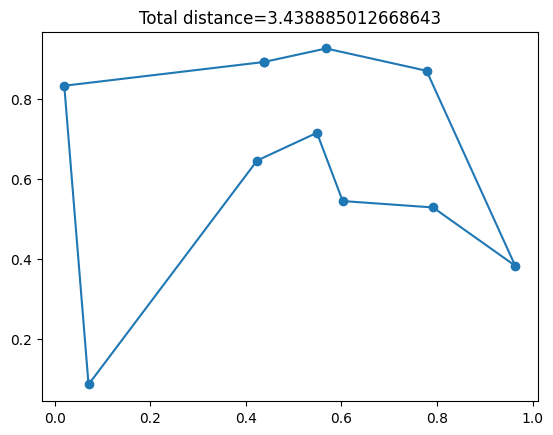

T=   0.02188 , distance=   3.43889 acc.steps=39


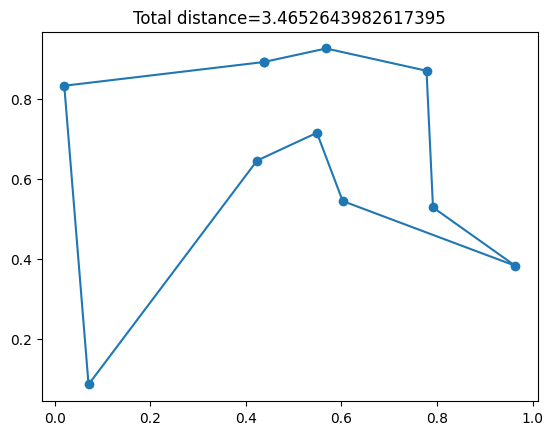

T=   0.01970 , distance=   3.46526 acc.steps=61


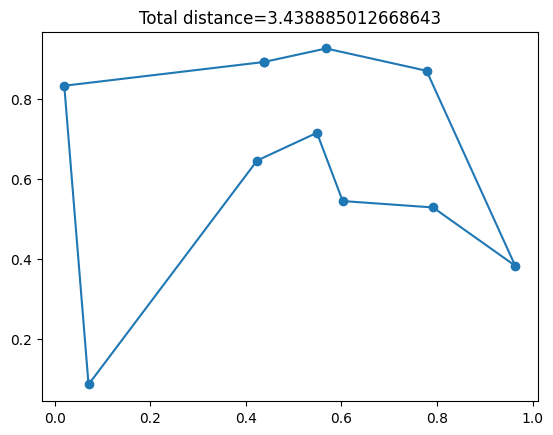

T=   0.01773 , distance=   3.43889 acc.steps=39


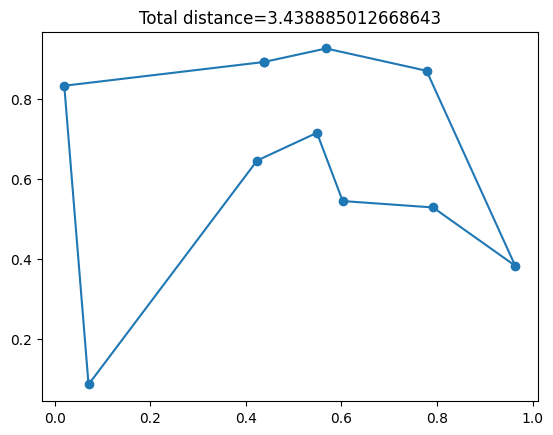

T=   0.01595 , distance=   3.43889 acc.steps=56


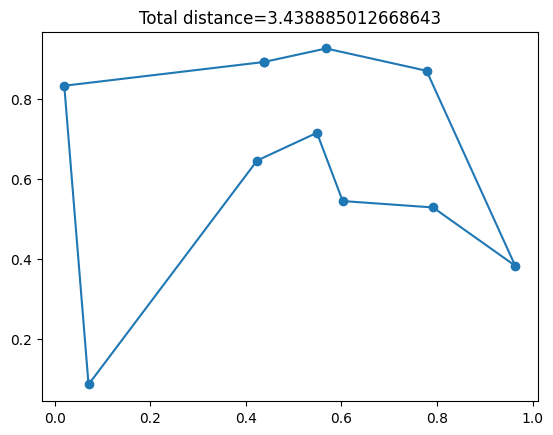

T=   0.01436 , distance=   3.43889 acc.steps=32


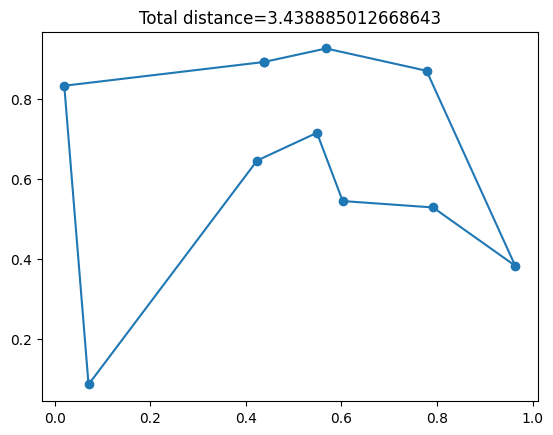

T=   0.01292 , distance=   3.43889 acc.steps=24


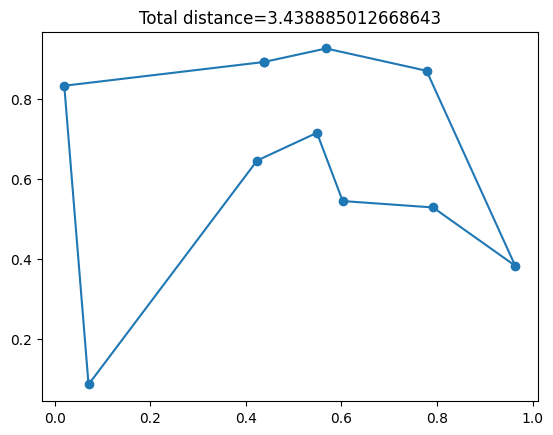

T=   0.01163 , distance=   3.43889 acc.steps=20


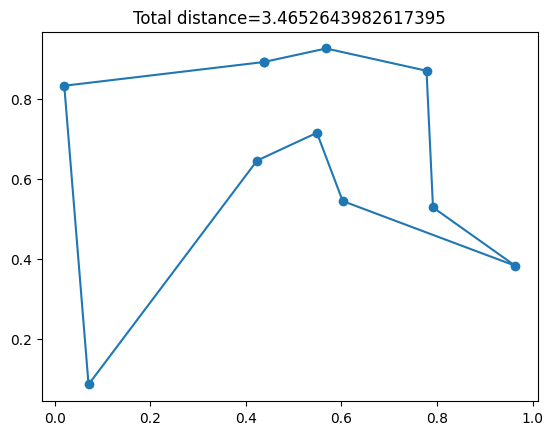

T=   0.01047 , distance=   3.46526 acc.steps=21


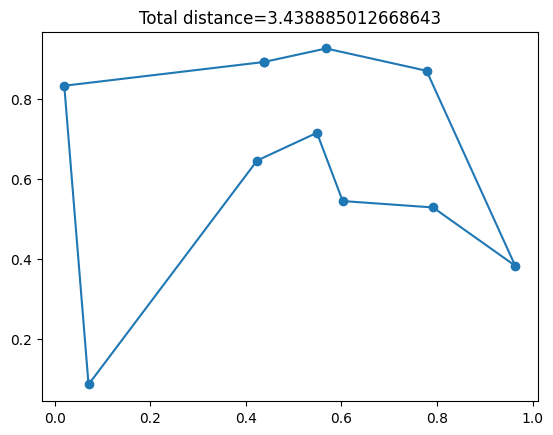

T=   0.00942 , distance=   3.43889 acc.steps=23


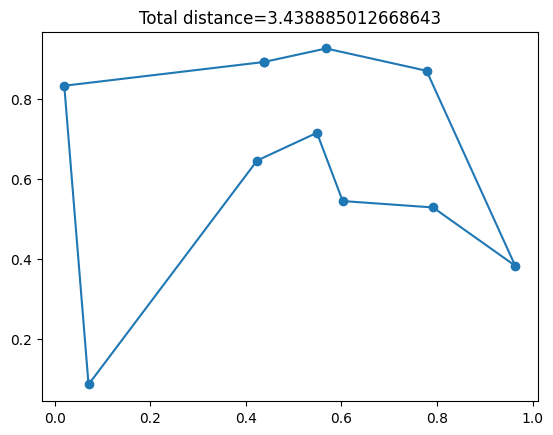

T=   0.00848 , distance=   3.43889 acc.steps=14


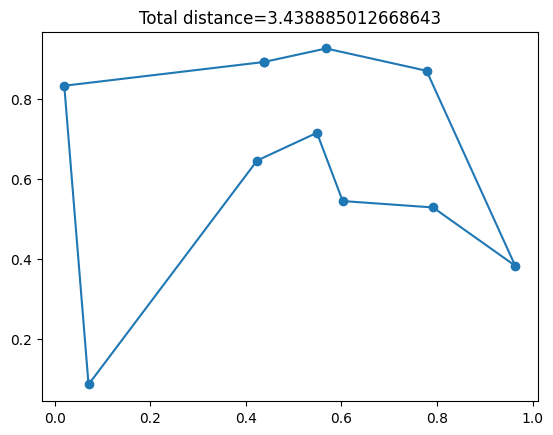

T=   0.00763 , distance=   3.43889 acc.steps=2


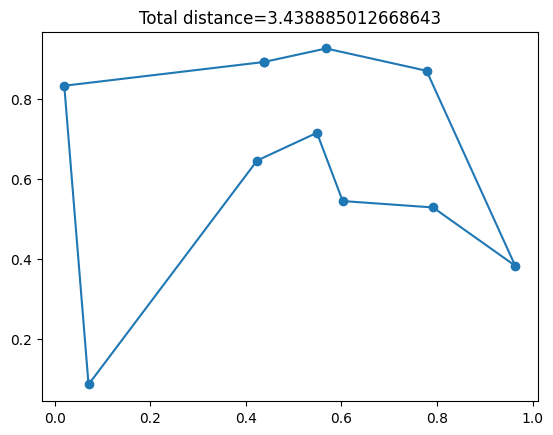

T=   0.00687 , distance=   3.43889 acc.steps=4


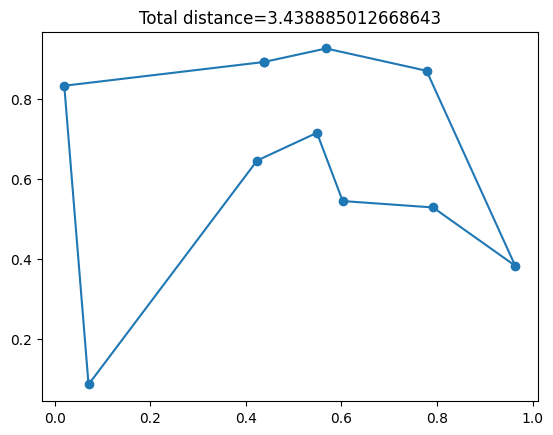

T=   0.00618 , distance=   3.43889 acc.steps=8


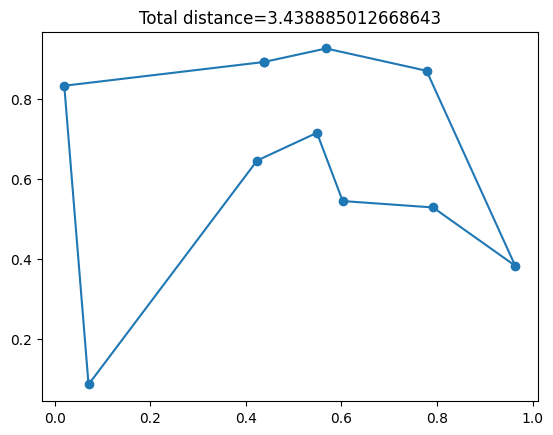

T=   0.00556 , distance=   3.43889 acc.steps=0


In [12]:
from numpy import random

ncity = 10 #도시의 갯수
maxSteps = 100*ncity
maxAccepted = 10*ncity
Tstart = 0.2
fCool = 0.9
maxTsteps = 100

random.seed(0)

R = random.random((ncity,2))
city = list(range(ncity))

ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)